In [1]:
import pandas as pd
import datetime as dt
import os

import re
clean = re.compile('<.*?>') #this is the line for clean text 

from urllib.request import Request, urlopen

import requests
from bs4 import BeautifulSoup
import pickle

import string

In [2]:
df = pd.read_csv('df.csv')
print(len(df))
df['name'] = df['URL'].map(lambda x: x[-14:-5])

df = df.head(50) ###Get first 10 line

df

970


,Unnamed: 0,Titr,URL,name
0,0,Air Canada Reports Second Quar,https://www.newswire.ca/news-releases/air-cana...,809761194
1,1,Air Canada Implements New Bios,https://www.newswire.ca/news-releases/air-cana...,838390282
2,2,Air Canada Partners with Montr,https://www.newswire.ca/news-releases/air-cana...,851172458
3,3,Air Canada Proposes Science-Ba,https://www.newswire.ca/news-releases/air-cana...,817274720
4,4,Air Canada Partners with Cleve,https://www.newswire.ca/news-releases/air-cana...,821104594
5,5,Air Canada to Explore Rapid CO,https://www.newswire.ca/news-releases/air-cana...,885606024
6,6,Media Advisory - Air Canada to,https://www.newswire.ca/news-releases/media-ad...,803463426
7,7,Air Canada Discontinues Servic,https://www.newswire.ca/news-releases/air-cana...,826282841
8,8,Air Canada Further Refines Ind,https://www.newswire.ca/news-releases/air-cana...,890558399
9,9,Air Canada Announces Election,https://www.newswire.ca/news-releases/air-cana...,815944595


In [3]:
# text_files = 'D:/Machine Learnaing/Web_Scrapping/'
# file_status = os.stat(text_files)
# print(file_status)

# #######################################
# df['file_size'] = ''
# for i in range(len(df)):
#     df.loc[i, 'file_size'] = os.path.getsize(text_files + df.loc[i, 'text_file'])
#     print(i)
# df

In [4]:
# df.to_csv('df_with_size.csv')

In [5]:
def read_link(link):  #function to read a text and coonvert to soup
    req = Request(link, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()
    soup = BeautifulSoup(html, 'lxml')
    return soup

def texts_list(link):   #read the soup and clean the body of text. output is a List 
    req = Request(link, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()
    soup = BeautifulSoup(html, 'lxml')
    texts = soup.find_all('p')
    text_list = []
    for text in texts:
        clean_text = (re.sub(clean, '',str(text)))
        text_list.append(clean_text)
    return text_list

In [6]:
transcripts = []
for i in range(len(df)):
    txt = texts_list(df.loc[i, 'URL'])
    transcripts.append(txt)

In [7]:
name = df['name']
name = list(name)
# name

In [8]:
# for file in name:
#     with open('D:/Machine Learnaing/Web_Scrapping/' + file, 'rb') as f:
#         content = f.read().decode('utf-8')
        
#     content = [x.strip() for x in content] 
#     transcripts.append(content)

In [9]:
transcripts

[['Searching for your content...',
  'Phone',
  '\n 877-269-7890 from 8 AM - 10 PM ET\n',
  '\nContact Cision\n',
  '\n 877-269-7890\n\nfrom 8 AM - 10 PM ET\n',
  'News provided by',
  'Jul 31, 2020, 06:00 ET',
  'Share this article',
  "MONTREAL, July 31, 2020 /CNW Telbec/ -\xa0Air Canada today reported unrestricted liquidity of $9.120 billion at June 30, 2020, in line with Air Canada's expectations, compared to unrestricted liquidity of $7.380 billion at December 31, 2019.\xa0Total revenues fell from $4.738 billion in the second quarter of 2019 to $527 million in the second quarter this year, a decline of $4.211 billion or 89 per cent. Cargo revenue increased 52 per cent to $269 million.\xa0 The airline reported second quarter 2020 negative EBITDA(1) (excluding special items) or (earnings before interest, taxes, depreciation and amortization) of $832 million compared to second quarter 2019 EBITDA of $916 million.\xa0 Air Canada reported an operating loss of $1.555 billion in the seco

In [10]:
# file = open('transcripts/Jul2320201032ET.txt', 'rb')
# for line in file:
#     print(line)

In [11]:
for i, c in enumerate(name):
    with open('D:/Machine Learnaing/Web_Scrapping/transcripts/'  + c, 'wb') as file:
        pickle.dump(transcripts[i], file)

In [12]:
data = {}

for i, c in enumerate(name):
    with open('D:/Machine Learnaing/Web_Scrapping/transcripts/' + c, 'rb') as file:
        data[c] = pickle.load(file)

In [13]:
data.keys()

dict_keys(['809761194', '838390282', '851172458', '817274720', '821104594', '885606024', '803463426', '826282841', '890558399', '815944595', '856479812', '884315329', '836810643', '831660608', '812920478', '886686701', '810206492', '830478544', '857005307', '848341320', '849968623', '803229084', '898264391', '828228130', '862056400', '874178532', '835211778', '807478377', '851155227', '861868258', '877854888', '831116675', '878999395', '889210132', '826789173', '861084476', '881856903', '857462369', '898208266', '813500065', '880139839', '845824523', '804223431', '860564475', '819232970', '856173233', '819306208', '848401800', '813827197', '894319054'])

In [14]:
# data['Jul3120200600ET.txt'][:2]

In [15]:
next(iter(data.keys()))

'809761194'

In [16]:
data.values()

dict_values([['Searching for your content...', 'Phone', '\n 877-269-7890 from 8 AM - 10 PM ET\n', '\nContact Cision\n', '\n 877-269-7890\n\nfrom 8 AM - 10 PM ET\n', 'News provided by', 'Jul 31, 2020, 06:00 ET', 'Share this article', "MONTREAL, July 31, 2020 /CNW Telbec/ -\xa0Air Canada today reported unrestricted liquidity of $9.120 billion at June 30, 2020, in line with Air Canada's expectations, compared to unrestricted liquidity of $7.380 billion at December 31, 2019.\xa0Total revenues fell from $4.738 billion in the second quarter of 2019 to $527 million in the second quarter this year, a decline of $4.211 billion or 89 per cent. Cargo revenue increased 52 per cent to $269 million.\xa0 The airline reported second quarter 2020 negative EBITDA(1) (excluding special items) or (earnings before interest, taxes, depreciation and amortization) of $832 million compared to second quarter 2019 EBITDA of $916 million.\xa0 Air Canada reported an operating loss of $1.555 billion in the second q

In [17]:
next(iter(data.values()))

['Searching for your content...',
 'Phone',
 '\n 877-269-7890 from 8 AM - 10 PM ET\n',
 '\nContact Cision\n',
 '\n 877-269-7890\n\nfrom 8 AM - 10 PM ET\n',
 'News provided by',
 'Jul 31, 2020, 06:00 ET',
 'Share this article',
 "MONTREAL, July 31, 2020 /CNW Telbec/ -\xa0Air Canada today reported unrestricted liquidity of $9.120 billion at June 30, 2020, in line with Air Canada's expectations, compared to unrestricted liquidity of $7.380 billion at December 31, 2019.\xa0Total revenues fell from $4.738 billion in the second quarter of 2019 to $527 million in the second quarter this year, a decline of $4.211 billion or 89 per cent. Cargo revenue increased 52 per cent to $269 million.\xa0 The airline reported second quarter 2020 negative EBITDA(1) (excluding special items) or (earnings before interest, taxes, depreciation and amortization) of $832 million compared to second quarter 2019 EBITDA of $916 million.\xa0 Air Canada reported an operating loss of $1.555 billion in the second quarte

In [18]:
data.items()

dict_items([('809761194', ['Searching for your content...', 'Phone', '\n 877-269-7890 from 8 AM - 10 PM ET\n', '\nContact Cision\n', '\n 877-269-7890\n\nfrom 8 AM - 10 PM ET\n', 'News provided by', 'Jul 31, 2020, 06:00 ET', 'Share this article', "MONTREAL, July 31, 2020 /CNW Telbec/ -\xa0Air Canada today reported unrestricted liquidity of $9.120 billion at June 30, 2020, in line with Air Canada's expectations, compared to unrestricted liquidity of $7.380 billion at December 31, 2019.\xa0Total revenues fell from $4.738 billion in the second quarter of 2019 to $527 million in the second quarter this year, a decline of $4.211 billion or 89 per cent. Cargo revenue increased 52 per cent to $269 million.\xa0 The airline reported second quarter 2020 negative EBITDA(1) (excluding special items) or (earnings before interest, taxes, depreciation and amortization) of $832 million compared to second quarter 2019 EBITDA of $916 million.\xa0 Air Canada reported an operating loss of $1.555 billion in

In [19]:
def combine_text(list_of_text):
    combine_text = ' '.join(list_of_text)
    return combine_text

In [20]:
# cf = b' '.join(data.values())

In [21]:
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [22]:
data_combined

{'809761194': ['Searching for your content... Phone \n 877-269-7890 from 8 AM - 10 PM ET\n \nContact Cision\n \n 877-269-7890\n\nfrom 8 AM - 10 PM ET\n News provided by Jul 31, 2020, 06:00 ET Share this article MONTREAL, July 31, 2020 /CNW Telbec/ -\xa0Air Canada today reported unrestricted liquidity of $9.120 billion at June 30, 2020, in line with Air Canada\'s expectations, compared to unrestricted liquidity of $7.380 billion at December 31, 2019.\xa0Total revenues fell from $4.738 billion in the second quarter of 2019 to $527 million in the second quarter this year, a decline of $4.211 billion or 89 per cent. Cargo revenue increased 52 per cent to $269 million.\xa0 The airline reported second quarter 2020 negative EBITDA(1) (excluding special items) or (earnings before interest, taxes, depreciation and amortization) of $832 million compared to second quarter 2019 EBITDA of $916 million.\xa0 Air Canada reported an operating loss of $1.555 billion in the second quarter of 2020 compare

In [23]:
data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
803229084,Searching for your content... Phone \n 877-269...
803463426,Searching for your content... Phone \n 877-269...
804223431,Searching for your content... Phone \n 877-269...
807478377,Searching for your content... Phone \n 877-269...
809761194,Searching for your content... Phone \n 877-269...
810206492,Searching for your content... Phone \n 877-269...
812920478,Searching for your content... Phone \n 877-269...
813500065,Searching for your content... Phone \n 877-269...
813827197,Searching for your content... Phone \n 877-269...
815944595,Searching for your content... Phone \n 877-269...


In [24]:
# data_df.transcript.loc['Jul0820201200ET.txt']

In [25]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [26]:
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean.to_pickle('D:/Machine Learnaing/Web_Scrapping/transcripts/corpsus.pkl')

In [27]:
data_clean.loc['898264391', 'transcript']

'searching for your content phone \n  from  am   pm et\n \ncontact cision\n \n \n\nfrom  am   pm et\n news provided by may    et share this article comprehensive program to provide greater peace of mind during all stages of travel montreal may\xa0\xa0 cnw \xa0air\xa0canada today announced the launch of air canada cleancare a comprehensive program for personal safety and enhanced aircraft grooming to provide customers greater peace of mind during all stages of travel the new program is designed to reduce the risk of exposure to  through such measures as mandatory preflight customer temperature checks in addition to required health questionnaires seat assignment policies to allow for more personal space in economy class on all flights until june   and by providing all customers with care kits for hand cleaning and hygiene to supplement these individual measures air canada cleancare will also strengthen the airlines industryleading cabin grooming standards with the introduction of electro

In [28]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aar,aars,ability,able,aboard,abridge,abridged,abroad,abrupt,abruptly,...,ymx,york,yorklaguardia,young,younger,youth,yvr,zones,zurich,ça
803229084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
803463426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
804223431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0
807478377,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
809761194,0,0,7,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
810206492,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
812920478,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
813500065,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
813827197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
815944595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
data_dtm.to_pickle("dtm.pkl")

In [30]:
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [31]:
# data = pd.read_pickle('dtm.pkl')
data = data_dtm.transpose()
data.head()

,803229084,803463426,804223431,807478377,809761194,810206492,812920478,813500065,813827197,815944595,...,880139839,881856903,884315329,885606024,886686701,889210132,890558399,894319054,898208266,898264391
aar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aars,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,7,0,0,0,0,0,...,7,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
aboard,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [32]:
# Find the top 30 words in each news
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'803229084': [('air', 31),
  ('canada', 21),
  ('canadas', 13),
  ('plan', 12),
  ('rights', 11),
  ('statements', 9),
  ('shareholders', 9),
  ('forwardlooking', 9),
  ('renewed', 7),
  ('date', 6),
  ('information', 5),
  ('largest', 4),
  ('factors', 4),
  ('annual', 4),
  ('news', 4),
  ('meeting', 4),
  ('et', 4),
  ('business', 4),
  ('market', 3),
  ('close', 3),
  ('current', 3),
  ('approved', 3),
  ('release', 3),
  ('future', 3),
  ('including', 3),
  ('results', 3),
  ('terms', 3),
  ('international', 3),
  ('identified', 3),
  ('pm', 3)],
 '803463426': [('canada', 10),
  ('air', 9),
  ('et', 5),
  ('chief', 4),
  ('available', 3),
  ('july', 3),
  ('conference', 3),
  ('questions', 3),
  ('friday', 3),
  ('analysts', 3),
  ('market', 3),
  ('pm', 3),
  ('officer', 3),
  ('executive', 3),
  ('webcast', 2),
  ('details', 2),
  ('free', 2),
  ('quarter', 2),
  ('listen', 2),
  ('replay', 2),
  ('passcode', 2),
  ('president', 2),
  ('second', 2),
  ('results', 2),
  ('larges

In [33]:
# Print the top 15 words in each news
for news, top_words in top_dict.items():
    print(news)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

803229084
air, canada, canadas, plan, rights, statements, shareholders, forwardlooking, renewed, date, information, largest, factors, annual
---
803463426
canada, air, et, chief, available, july, conference, questions, friday, analysts, market, pm, officer, executive
---
804223431
air, canada, women, aviation, scholarship, flight, captain, international, judy, cameron, canadas, female, careers, largest
---
807478377
canada, air, flights, canadians, largest, canadas, canadian, et, march, thousands, america, home, food, asia
---
809761194
air, canada, quarter, second, billion, canadas, million, net, cash, measures, including, statements, forwardlooking, travel
---
810206492
canada, air, convertible, shares, offering, securities, notes, voting, share, class, statements, forwardlooking, canadas, offered
---
812920478
air, canada, securities, statements, forwardlooking, canadas, offering, convertible, notes, shares, factors, proceeds, share, pandemic
---
813500065
canada, air, airline, cust

In [34]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for news in data.columns:
    top = [word for (word, count) in top_dict[news]]
    for t in top:
        words.append(t)
        
words

['air',
 'canada',
 'canadas',
 'plan',
 'rights',
 'statements',
 'shareholders',
 'forwardlooking',
 'renewed',
 'date',
 'information',
 'largest',
 'factors',
 'annual',
 'news',
 'meeting',
 'et',
 'business',
 'market',
 'close',
 'current',
 'approved',
 'release',
 'future',
 'including',
 'results',
 'terms',
 'international',
 'identified',
 'pm',
 'canada',
 'air',
 'et',
 'chief',
 'available',
 'july',
 'conference',
 'questions',
 'friday',
 'analysts',
 'market',
 'pm',
 'officer',
 'executive',
 'webcast',
 'details',
 'free',
 'quarter',
 'listen',
 'replay',
 'passcode',
 'president',
 'second',
 'results',
 'largest',
 'player',
 'source',
 'toll',
 'media',
 'rousseau',
 'air',
 'canada',
 'women',
 'aviation',
 'scholarship',
 'flight',
 'captain',
 'international',
 'judy',
 'cameron',
 'canadas',
 'female',
 'careers',
 'largest',
 'et',
 'airports',
 'canadian',
 'airline',
 'america',
 'pilots',
 'young',
 'winners',
 'toronto',
 'cadet',
 'market',
 'service',

In [35]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('air', 50),
 ('canada', 50),
 ('largest', 45),
 ('canadas', 44),
 ('et', 44),
 ('market', 40),
 ('airline', 40),
 ('pm', 36),
 ('international', 33),
 ('information', 32),
 ('airports', 21),
 ('america', 20),
 ('including', 19),
 ('network', 18),
 ('canadian', 17),
 ('source', 14),
 ('flights', 14),
 ('customers', 14),
 ('passenger', 13),
 ('statements', 12),
 ('forwardlooking', 12),
 ('news', 12),
 ('results', 12),
 ('program', 11),
 ('carrier', 11),
 ('north', 10),
 ('canadians', 9),
 ('march', 9),
 ('measures', 9),
 ('scheduled', 9),
 ('factors', 8),
 ('travel', 8),
 ('share', 8),
 ('aircraft', 8),
 ('officer', 7),
 ('toronto', 7),
 ('service', 7),
 ('services', 7),
 ('new', 7),
 ('employees', 7),
 ('chief', 6),
 ('available', 6),
 ('executive', 6),
 ('quarter', 6),
 ('home', 6),
 ('class', 6),
 ('operate', 6),
 ('aircanadacommedia', 6),
 ('aeroplan', 6),
 ('partners', 6),
 ('additional', 6),
 ('date', 5),
 ('boeing', 5),
 ('special', 5),
 ('government', 5),
 ('million', 5),
 ('ne

In [36]:
# If more than half of the news have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['air',
 'canada',
 'largest',
 'canadas',
 'et',
 'market',
 'airline',
 'pm',
 'international',
 'information',
 'airports',
 'america',
 'including',
 'network',
 'canadian',
 'source',
 'flights',
 'customers',
 'passenger',
 'statements',
 'forwardlooking',
 'news',
 'results',
 'program',
 'carrier',
 'north',
 'canadians',
 'march',
 'measures',
 'scheduled',
 'factors',
 'travel',
 'share',
 'aircraft',
 'officer',
 'toronto',
 'service',
 'services',
 'new',
 'employees']

In [37]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [38]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42);

In C:\Users\hanif\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanif\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanif\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hanif\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanif\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [39]:
name

['809761194',
 '838390282',
 '851172458',
 '817274720',
 '821104594',
 '885606024',
 '803463426',
 '826282841',
 '890558399',
 '815944595',
 '856479812',
 '884315329',
 '836810643',
 '831660608',
 '812920478',
 '886686701',
 '810206492',
 '830478544',
 '857005307',
 '848341320',
 '849968623',
 '803229084',
 '898264391',
 '828228130',
 '862056400',
 '874178532',
 '835211778',
 '807478377',
 '851155227',
 '861868258',
 '877854888',
 '831116675',
 '878999395',
 '889210132',
 '826789173',
 '861084476',
 '881856903',
 '857462369',
 '898208266',
 '813500065',
 '880139839',
 '845824523',
 '804223431',
 '860564475',
 '819232970',
 '856173233',
 '819306208',
 '848401800',
 '813827197',
 '894319054']

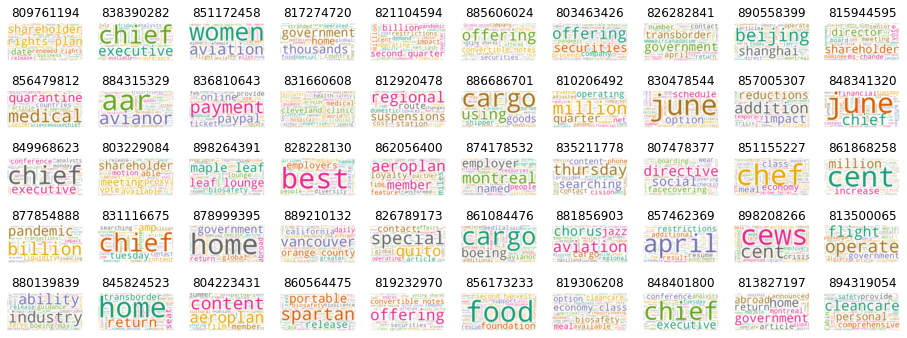

In [40]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]



# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(5, 10, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(name[index])
   

# Number of Words
    
## Analysis

In [41]:
# Find the number of unique words that there aer in each news

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
News = []
for news in data.columns:
    uniques = data[news].to_numpy().nonzero()[0].size
    unique_list.append(uniques)
    News.append(news)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(News, unique_list)), columns=['News', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort.head()

,News,unique_words
26,849968623,72
31,857005307,73
19,831660608,74
20,835211778,127
1,803463426,128


In [42]:
# Let's plot our findings
import numpy as np

